# Mutimobidity prediction

## 1. Basic Data Understanding
### a) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### b) Loading Multimobidity Dataset

In [2]:
df = pd.read_csv("synthetic_multimorbidity_dataset FOR training the models.csv")
df.head()

,Age,Gender,Polyuria,Weight_loss,Weakness,Polyphagia,Genital_thrush,Visual_blurring,Itching,Irritability,Delayed_healing,Partial_paresis,Muscle_stiffness,Alopecia,Obesity,Multimorbidity
0,71,Male,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,34,Female,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,80,Male,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,40,Male,1,0,0,1,0,1,0,1,0,0,1,0,0,0
4,43,Male,0,1,0,1,0,1,1,0,0,1,0,0,0,0


#### b) Check column info to confirm column types and missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Gender            1000 non-null   object
 2   Polyuria          1000 non-null   int64 
 3   Weight_loss       1000 non-null   int64 
 4   Weakness          1000 non-null   int64 
 5   Polyphagia        1000 non-null   int64 
 6   Genital_thrush    1000 non-null   int64 
 7   Visual_blurring   1000 non-null   int64 
 8   Itching           1000 non-null   int64 
 9   Irritability      1000 non-null   int64 
 10  Delayed_healing   1000 non-null   int64 
 11  Partial_paresis   1000 non-null   int64 
 12  Muscle_stiffness  1000 non-null   int64 
 13  Alopecia          1000 non-null   int64 
 14  Obesity           1000 non-null   int64 
 15  Multimorbidity    1000 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 125.1+ KB


## Exploratory Data Analysis

### 1. Check Target Distribution & Visualize
#### a) Countplot (absolute counts)

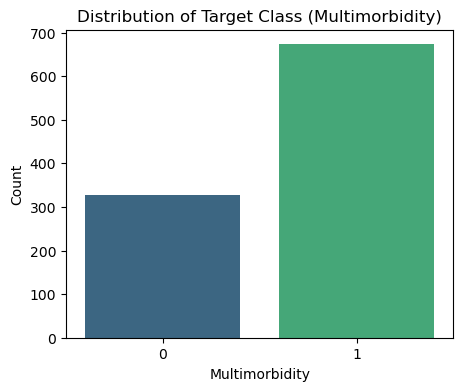

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x='Multimorbidity', hue= "Multimorbidity", 
              legend= False, data=df, palette='viridis')
plt.title('Distribution of Target Class (Multimorbidity)')
plt.xlabel('Multimorbidity')
plt.ylabel('Count')
plt.show()


#### b) Pie chart (proportions)

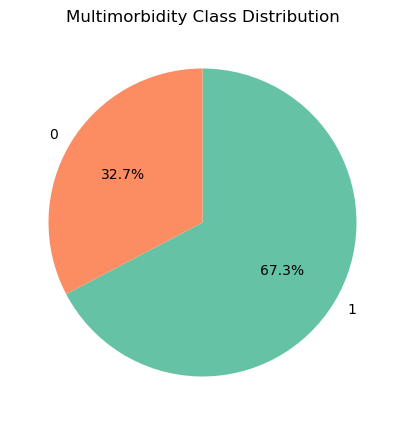

In [5]:
plt.figure(figsize=(5,5))
df['Multimorbidity'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#66c2a5','#fc8d62']
)
plt.ylabel('')
plt.title('Multimorbidity Class Distribution')
plt.show()


From the two plots, the dataset is imbalanced:

- Class 0 (no multimorbidity) ~ 330 cases ~ 32.7%

- Class 1 (with multimorbidity) ≈ 670 cases ~ 67.3%